In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gen_chaos(start, steps, func, to_array=True):
    res = []
    cur = start
    for _ in range(steps):
        cur = func(cur)
        res.append(cur)
    return np.array(res) if to_array else res

def f(x):
    eps_f = 1e-2
    det = (1.5 * x * np.sin(x**-2) - np.tan(x)) / (x+1)**4.5
    rand = np.random.random()
    return det + eps_f * rand
    # return np.log(x+1) / x**2 # np.log(x+1) / (3 ** np.sqrt(x+1)) + 0.0005 * x**1.3

def plot_chaos(seed=1):
    np.random.seed(seed)
    
    n = 100
    xs = np.arange(n)
    ys = gen_chaos(1, xs.size, f)
    # sigma_ys = 1e-2
    # ys2 = ys + np.random.normal(size=ys.shape, scale=sigma_ys)
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(xs, ys)
    # ax.plot(xs, ys2)

# plot_chaos()

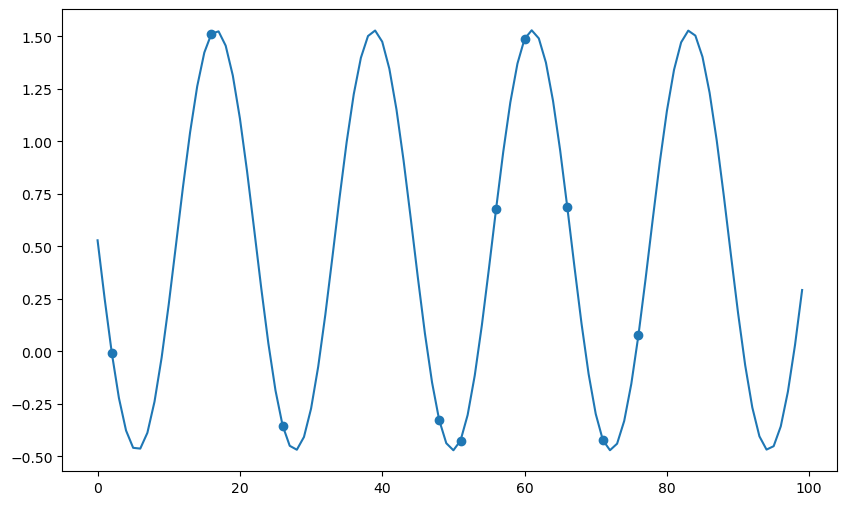

In [10]:
def f(x):
    eps = 0.3
    scale = MAX_N / 4
    return np.sin(scale * x) + np.random.randn(1)*eps


def sample_sin(N=30, MAX_N=100, seed=0):
    np.random.seed(seed)
    
    X = np.arange(MAX_N)
    Y = f(X)
    
    some_X = np.random.choice(X, N, replace=False)
    some_Y = Y[some_X]
    return X.reshape(-1, 1), Y.reshape(-1, 1), some_X.reshape(-1, 1), some_Y.reshape(-1, 1)


def plot_sampled_sin(X, Y, some_X, some_Y, figsize=(15,8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(X, Y)
    ax.scatter(some_X, some_Y)

MAX_N = 24

X, Y, some_X, some_Y = sample_sin(N=10)
plot_sampled_sin(X, Y, some_X, some_Y, figsize=(10,6))

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF


# X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
# y = np.squeeze(X * np.sin(X))

# X_train, y_train = X[training_indices], y[training_indices]
X_train, y_train = some_X, some_Y
y = Y

rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(y.size), size=6, replace=False)

kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=200)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

mean_prediction, std_prediction = gaussian_process.predict(X, return_std=True)

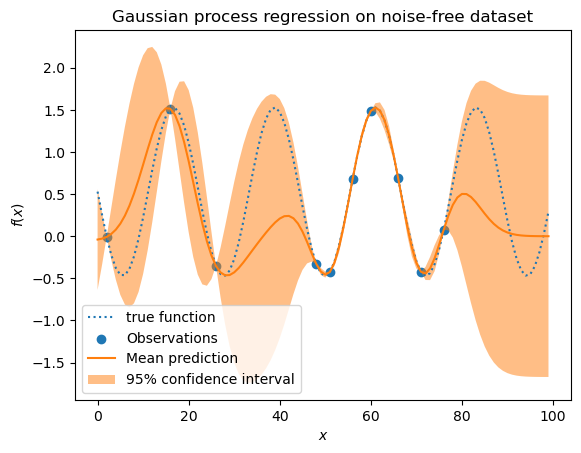

In [19]:
# plot GP

plt.plot(X, y, label=r"true function", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, mean_prediction, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [15]:
######## Deterministic ########

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR


# train_size = training_indices.size

# svr = GridSearchCV(
#     SVR(kernel="rbf", gamma=0.1),
#     param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)},
# )

kr = GridSearchCV(
    KernelRidge(kernel="rbf", gamma=0.1),
    param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3], "gamma": np.logspace(-2, 2, 5)},
)

# kr = KernelRidge(kernel="rbf", gamma=0.1)
kr.fit(X_train, y_train)
kr_pred = kr.predict(X)

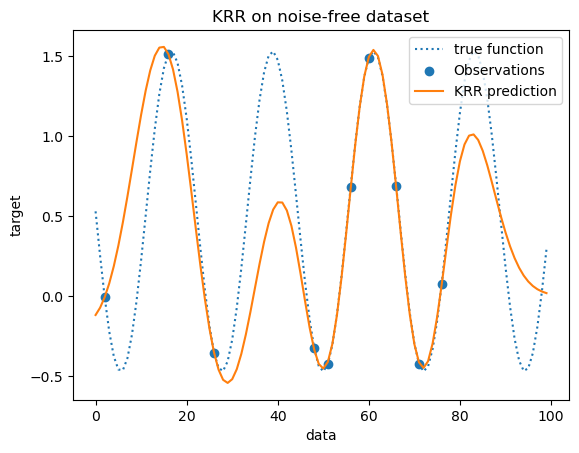

In [17]:
# plot KRR

plt.plot(X, y, label=r"true function", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, kr_pred, label="KRR prediction")
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("KRR on noise-free dataset")

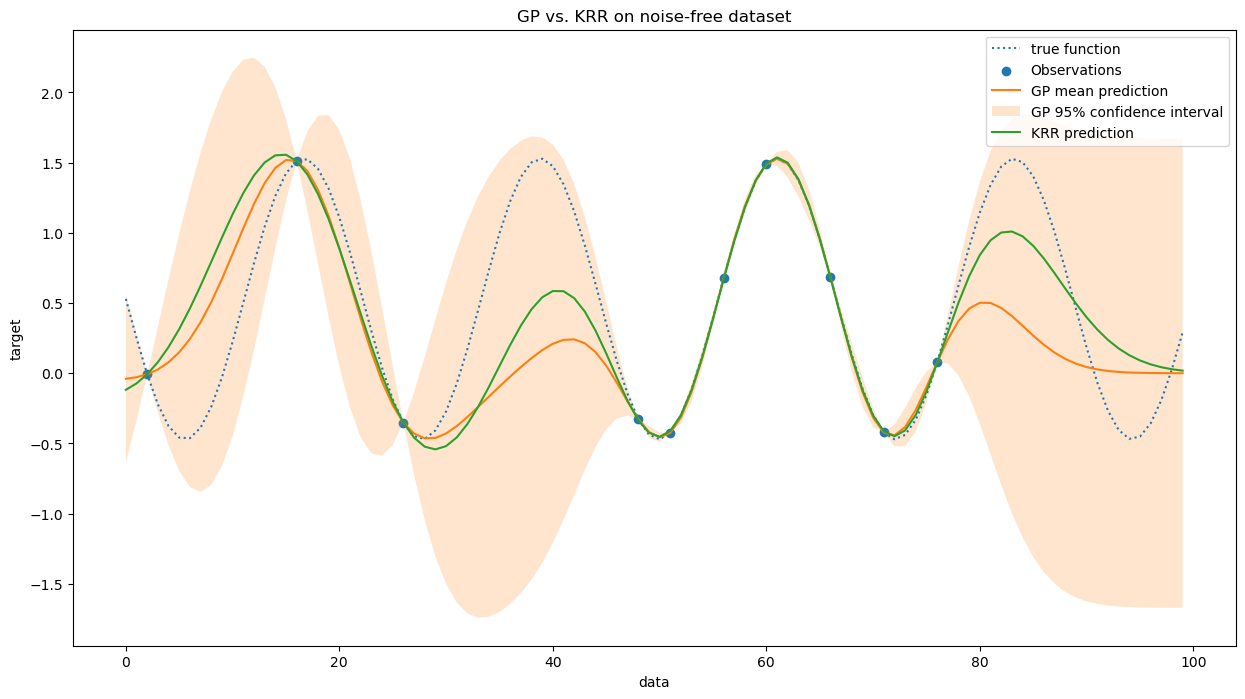

In [27]:
# plot both

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(X, y, label=r"true function", linestyle="dotted")
ax.scatter(X_train, y_train, label="Observations")

# GP
ax.plot(X, mean_prediction, label="GP mean prediction")
ax.fill_between(
    X.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.2,
    label=r"GP 95% confidence interval",
)

# KRR
ax.plot(X, kr_pred, label="KRR prediction")

ax.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("GP vs. KRR on noise-free dataset")

In [ ]:
# ### GPy test ###

# import GPy
# GPy.plotting.change_plotting_library('plotly')


# X = np.random.uniform(-3.,3.,(20,1))
# Y = np.sin(X) + np.random.randn(20,1)*0.05
# kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
# m = GPy.models.GPRegression(X,Y,kernel)

# # fig = m.plot()
# # GPy.plotting.show(fig, filename='basic_gp_regression_notebook')


# # m.optimize_restarts(num_restarts = 10)
# # fig = m.plot()
# # GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')

# # fig = m.plot()
# # help(m.plot)
# # display(type(fig), fig)
# # GPy.plotting.show(fig['dataplot'], filename='basic_gp_regression_notebook')